In [1]:
# Importing Libraries
try:
    import pandas as pd
    import numpy as np
    import os,sys
    import re
    import matplotlib.pyplot as plt
    from itertools import cycle
    # importing algorithms
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn import svm
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
    from sklearn.preprocessing import StandardScaler, Normalizer
    from sklearn.preprocessing import label_binarize
    from sklearn.multiclass import OneVsRestClassifier
except Exception as e:
    print("Error is due to",e)
pwd = os.getcwd()
labels_df = pd.read_csv(pwd+"//Datasets//Kabita//Input//kabita_dataset_labels.csv")
y_df = labels_df['kabita_labels']

In [2]:
# Binarize the output
y = label_binarize(y_df, classes=[1,2,3,4,5,6,7])
n_classes = y[0].shape[0]

### Verloop BERT Sentence Transformer Logistic Regression Model

In [3]:
# V BERT vectorized data
x_df = pd.read_csv(pwd+"//Datasets//Kabita//SentenceTransformers//bert_vectorized_kabita_dataset_vbert.csv")

# Test train split
x_train,x_test,y_train,y_test = train_test_split(x_df, y, test_size=0.30,random_state=21,stratify=y)

# Learn to predict each class against the other
model1 = OneVsRestClassifier(LogisticRegression(C=1, max_iter=5000))
y_score = model1.fit(x_train, y_train).decision_function(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

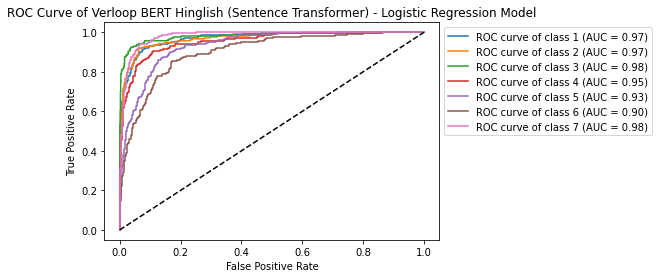

In [4]:
# Plotting ROC Curves and AUC
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i+1, round(auc(fpr[i], tpr[i]),2)),
    )

plt.plot([0, 1], [0, 1], "k--")
#
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Verloop BERT Hinglish (Sentence Transformer) - Logistic Regression Model")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Standardized Verloop BERT Hinglish Sentence Transformer SVM Model

In [5]:
# V BERT vectorized data
x_df = pd.read_csv(pwd+"//Datasets//Kabita//SentenceTransformers//bert_vectorized_kabita_dataset_vbert.csv")

# Test train split
x_train,x_test,y_train,y_test = train_test_split(x_df, y, test_size=0.30,random_state=21,stratify=y)

# Standard scaling of train data
standard_model = StandardScaler()
sscaled_data_train = standard_model.fit_transform(x_train)
# Standard scaling of test data
sscaled_data_test = standard_model.fit_transform(x_test)

# Learn to predict each class against the other
model1 = OneVsRestClassifier(svm.SVC(C=100, probability=True))
y_score = model1.fit(sscaled_data_train, y_train).decision_function(sscaled_data_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

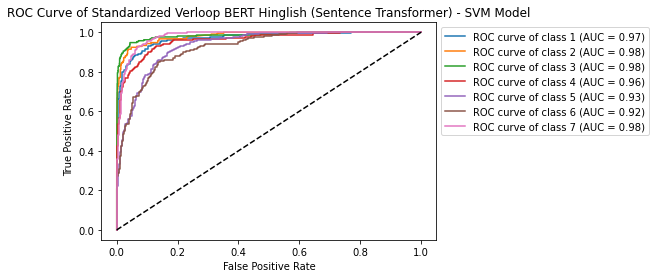

In [6]:
# Plotting ROC Curves and AUC
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i+1, round(auc(fpr[i], tpr[i]),2)),
    )

plt.plot([0, 1], [0, 1], "k--")
#
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Standardized Verloop BERT Hinglish (Sentence Transformer) - SVM Model")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Normalized Verloop BERT Sentence Transformer SVM Model

In [7]:
# V BERT vectorized data
x_df = pd.read_csv(pwd+"//Datasets//Kabita//SentenceTransformers//bert_vectorized_kabita_dataset_vbert.csv")

# Test train split
x_train,x_test,y_train,y_test = train_test_split(x_df, y, test_size=0.30,random_state=21,stratify=y)

# Normalize scaling of train data
normalize_model = Normalizer()
nscaled_data_train = normalize_model.fit_transform(x_train)
# Normalize scaling of test data
nscaled_data_test = normalize_model.fit_transform(x_test)

# Learn to predict each class against the other
model1 = OneVsRestClassifier(svm.SVC(C=10, gamma=1, probability=True))
y_score = model1.fit(nscaled_data_train, y_train).decision_function(nscaled_data_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

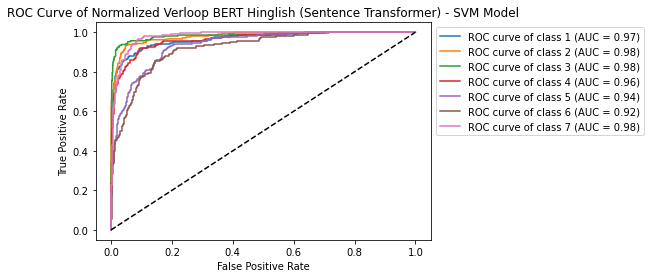

In [8]:
# Plotting ROC Curves and AUC
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i+1, round(auc(fpr[i], tpr[i]),2)),
    )

plt.plot([0, 1], [0, 1], "k--")
#
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Normalized Verloop BERT Hinglish (Sentence Transformer) - SVM Model")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Standardized Fine Tuned GPT Hinglish SVM Model

In [9]:
# GPT Hinglish vectorized data
x_df = pd.read_csv(pwd+"//Datasets//Kabita//FineTunedTransformers//gpt_hinglish_finetuned_vectorized_kabita_dataset.csv")

# Test train split
x_train,x_test,y_train,y_test = train_test_split(x_df, y, test_size=0.30,random_state=21,stratify=y)

# Standard scaling of train data
standard_model = StandardScaler()
sscaled_data_train = standard_model.fit_transform(x_train)
# Standard scaling of test data
sscaled_data_test = standard_model.fit_transform(x_test)

# Learn to predict each class against the other
model1 = OneVsRestClassifier(svm.SVC(C=10, gamma='auto', probability=True))
y_score = model1.fit(sscaled_data_train, y_train).decision_function(sscaled_data_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

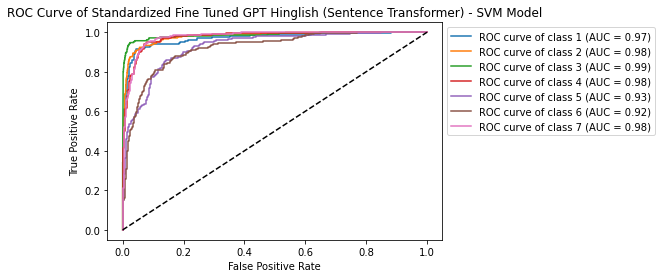

In [10]:
# Plotting ROC Curves and AUC
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i+1, round(auc(fpr[i], tpr[i]),2)),
    )

plt.plot([0, 1], [0, 1], "k--")
#
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Standardized Fine Tuned GPT Hinglish (Sentence Transformer) - SVM Model")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()